In [10]:
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [11]:
data =sm.datasets.fair.load_pandas().data

In [25]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


In [22]:
data.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

In [27]:
df=data.astype(int)

In [28]:
df.loc[(df['affairs'] > 1)] = 1

In [29]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9,3,3,17,2,5,0
1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1
3,4,37,16,4,3,16,5,5,0
4,1,1,1,1,1,1,1,1,1


In [31]:
df["affairs"].value_counts()

0    5247
1    1119
Name: affairs, dtype: int64

<AxesSubplot:>

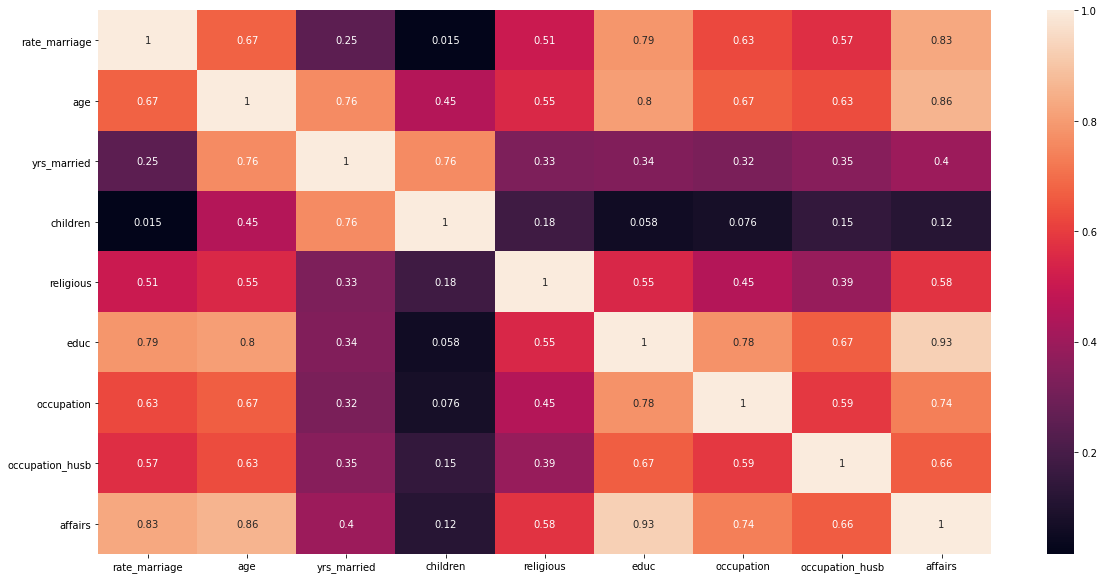

In [36]:
#co-relation
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)

In [39]:
x=df.drop(["affairs"], axis=1)
y=df["affairs"]

In [41]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(x)
scaled_data=pd.DataFrame(scaling.transform(x),columns=x.columns)

In [44]:
scaled_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,-0.442656,0.617088,0.201270,1.291443,0.798801,0.937039,-0.793686,1.005239
1,-1.797438,-1.862193,-0.865023,-0.252323,-1.251256,-2.012648,-1.591885,-1.439362
2,-1.797438,-1.862193,-0.865023,-0.252323,-1.251256,-2.012648,-1.591885,-1.439362
3,0.234735,1.016972,1.134276,2.063326,0.798801,0.752683,1.600913,1.005239
4,-1.797438,-1.862193,-0.865023,-0.252323,-1.251256,-2.012648,-1.591885,-1.439362


In [46]:
x_scaled=scaled_data
#data after removing the tax column
x_scaled.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,-0.442656,0.617088,0.201270,1.291443,0.798801,0.937039,-0.793686,1.005239
1,-1.797438,-1.862193,-0.865023,-0.252323,-1.251256,-2.012648,-1.591885,-1.439362
2,-1.797438,-1.862193,-0.865023,-0.252323,-1.251256,-2.012648,-1.591885,-1.439362
3,0.234735,1.016972,1.134276,2.063326,0.798801,0.752683,1.600913,1.005239
4,-1.797438,-1.862193,-0.865023,-0.252323,-1.251256,-2.012648,-1.591885,-1.439362


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=45)

In [60]:
logistic=LogisticRegression()

logistic.fit(x_train,y_train)

LogisticRegression()

In [61]:
scores=cross_val_score(logistic, x_train, y_train, cv=3).mean()

In [62]:
scores

1.0

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [65]:
y_pred=logistic.predict(x_test)

In [68]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [69]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1570,    0],
       [   0,  340]], dtype=int64)